# PLOT: minmium spanning tree
####  Data analysis of cgMLST result table in order to make diagnostic conclusions
Final script: "MST.r"

In [ ]:
#Adding R kernel to Jupyter
#install.packages('IRkernel') 
#IRkernel::installspec()

## Getting the data
### 1) Practise data
anomysed available data to run some tests

In [ ]:
getwd()

In [32]:
setwd("/home/hannelore/PROJECTHH/Tools/MST")
cgtable <- read.csv(file = "results_alleles-test.tsv",
                        sep = "\t", 
                        header = TRUE, 
                        stringsAsFactors = FALSE)
metadata <- read.csv(file = "Metadata-test.csv",
                     header = TRUE, 
                     stringsAsFactors = FALSE)
dim(cgtable)
cgtable[,1:5]
dim(metadata)
metadata


[1]    7 3199

FILE,GCF.001022015.protein114.fasta,GCF.001022015.protein195.fasta,GCF.001022015.protein2345.fasta,GCF.001022015.protein281.fasta
<chr>,<int>,<int>,<int>,<int>
1-382865710.fa,27,27,26,28
2-381153211.fa,3,3,3,29
3-385551709.fa,3,3,3,29
4-382034907.fa,17,8,17,20
5-389898211.fa,28,28,15,26
7-381935911.fa,17,8,17,20
8-381927309.fa,27,27,26,28


[1] 7 7

Exact.name,Nr,Run.nr,Date,ST.type,txid,intials
<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>
1-382865710.fa,1,S56,200612,108,158836,DVL
2-381153211.fa,2,S57,200612,145,158836,OL
3-385551709.fa,3,S58,200612,145,158836,OL
4-382034907.fa,4,S59,200612,133,158836,VDPA
5-389898211.fa,5,S60,200613,45,158836,VD
7-381935911.fa,7,S62,200613,133,158836,PA
8-381927309.fa,8,S63,200613,108,158836,VIC


In [36]:
#Cleaning DAta

#change rownames (from numbers to actual sample names)
row.names(cgtable)<-cgtable$FILE
#remove first column (with samples names)
cgtable<-cgtable[,-1]
#watch result
cgtable[,1:3]


,GCF.001022015.protein114.fasta,GCF.001022015.protein195.fasta,GCF.001022015.protein2345.fasta
,<int>,<int>,<int>
1-382865710.fa,27,27,26
2-381153211.fa,3,3,3
3-385551709.fa,3,3,3
4-382034907.fa,17,8,17
5-389898211.fa,28,28,15
7-381935911.fa,17,8,17
8-381927309.fa,27,27,26


### 2) Getting data from script

In [ ]:
TODOOOOOOOOOOOOOOOOOOO

## INTRO: Testing findings online search to make MST (minimum spanning tree) in R
I looked into these packages and tried some commands (summary not complete)

* 1) igraph: https://igraph.org/r/doc/graph_from_data_frame.html - problems with installing (see further)
* 2) SIT: https://github.com/systematicinvestor/SIT - problems with installing and using SIT
* 3) with Genind object https://grunwaldlab.github.io/poppr/reference/poppr.msn.htm - is specific for genotypes, not compatible with our analysis
* 4) outreaktools https://sites.google.com/site/therepiproject/r-pac/about - problems installing removed from CRAN repo, because no longer maintained...
* 5) outbreaker https://www.rdocumentation.org/packages/outbreaker/versions/1.1-8/topics/outbreaker - problems installing removed from CRAN repo, because no longer maintained...
* 6) Minimal spanning tree http://www.smartana.co.uk/mst-tutorial/MST.html
* ...

In [38]:
###GRASP OF TESTINGS

#installing edgeR
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install("edgeR")
library(edgeR)

## MAKE DISTANCE MATRIX -> FOUT: neemt in rekening het nummer van de type van de loci, maar is niet nodig, moet gewoon verschil aanduiden...
cgDist2<-as.matrix(dist(as.matrix(cgtable)))
cgGraph <- graph_from_data_frame(cgDist2, directed=TRUE, vertices=NULL)gtable))
dim(cgDist2)
#creating an igraph graph from a data frame
class (cgGraph)
#do mst
mst(cgGraph, weights=NULL, algorithm=NULL)
#only text??

#INSTALL SIT
library(curl)
library(quantmod)
library(devtools)
library(zoo)

devtools::install_github('systematicinvestor/SIT.date')
#tried to install manually
curl_download('https://github.com/systematicinvestor/SIT/raw/master/SIT.tar.gz', 'sit',mode = 'wb',quiet=T)
install.packages('sit', repos = NULL, type='source')

#outbreaktools INSTALL: fail
install.packages("OutbreakTools", dependencies=TRUE)

#outbreaker: fail
g <- transGraph(cgtable, thres=0)

##... many more


ERROR: Error in parse(text = x, srcfile = src): <text>:11:72: unexpected symbol
10: cgDist2<-as.matrix(dist(as.matrix(cgtable)))
11: cgGraph <- graph_from_data_frame(cgDist2, directed=TRUE, vertices=NULL)gtable
                                                                           ^


## THE PLAN

Goal: minimum spanning tree
- undirected (no arrows)
- weighted (edges: sizes must be known)
- depending on distance (not adjacency)

Steps:
- input: cgMLST table
- A. distance matrix
- B. MST object

- plotting the tree
 * weighted edgelist
 * coordinates
 * colors







### A. DISTANCE MATRIX

In [40]:
## DISTANCE MATRIX (pairwise, alleles)
cgdist1<-dist(cgtable)
#problems because of non-compatibility
#not fixed with converting to matrix
cgtableMAT<-as.matrix(cgtable)
cgdist2<-dist(cgtableMAT)

Warning message in dist(cgtable):
“NAs introduced by coercion”
Warning message in dist(cgtableMAT):
“NAs introduced by coercion”


In [37]:
#! Can't use normal distance matrix because you want absolute numbers of alleles -> use dist.gene from ape-package
library(ape)
cgmatrix <- as.matrix(cgtable)
cgdist <-dist.gene(cgmatrix, method= "pairwise", pairwise.deletion=FALSE)
cgdistMAT<-as.matrix(cgdist)
cgdistMAT

#remakr some tools for mst analysis require adjacency matrix !! Make sure you get the distance based tool 
#-> has reversed effect on plot#

,1-382865710.fa,2-381153211.fa,3-385551709.fa,4-382034907.fa,5-389898211.fa,7-381935911.fa,8-381927309.fa
1-382865710.fa,0,3163,3162,3113,3112,3114,7
2-381153211.fa,3163,0,6,3161,3161,3162,3163
3-385551709.fa,3162,6,0,3161,3161,3162,3162
4-382034907.fa,3113,3161,3161,0,2874,4,3112
5-389898211.fa,3112,3161,3161,2874,0,2875,3113
7-381935911.fa,3114,3162,3162,4,2875,0,3114
8-381927309.fa,7,3163,3162,3112,3113,3114,0


### B. MST object

In [ ]:
#with igraph (1) installing

#but problems installing in centos (no problem in windows)
library(igraph) #only for windows/MAC not linux...!!

#FIX: https://github.com/igraph/rigraph/issues/213
#This is because my CentOS system does not contain libiconv.so.2 shared library.
--- BASH
wget https://ftp.gnu.org/pub/gnu/libiconv/libiconv-1.15.tar.gz
tar -zxvf libiconv-1.15.tar.gz
cd libiconv-1.15
./configure --prefix=/usr/local
make
make install
export LD_LIBRARY_PATH=/usr/local/lib:$LD_LIBRARY_PATH
---
#fail...

#FIX2
--- BASH
yum install libxml2-devel
---
#fail...

#FIX3
--- BASH
yum install gcc-gfortran
---
#fail (was reeds geïnstalleerd)


#FIX4
#install binary
install.packages("igraph", type = "binary")
#doesn't work on this system(?)


#FIX5: error names libiconv.so.2
#install
---BASH
cd /usr/local/src
wget http://ftp.gnu.org/pub/gnu/libiconv/libiconv-1.14.tar.gz
tar -zxvf libiconv-1.14.tar.gz
cd libiconv-1.14
Configuration
./configure --prefix=/usr/local/libiconv
 Compile
make
 Install
make install
 Establish flexible connections
ln -s /usr/local/lib/libiconv.so /usr/lib
ln -s /usr/local/lib/libiconv.so.2 /usr/lib
---

#FIX6: error names libicui18n.so
#install
sudo yum isntall libicu
#already installed

--- 

#FIX7: openssl
sudo yum install openssl-devel

#FIX8: curl
sudo yum install curl
#was installed, nu upgraded
R: install.packages("RCurl)")

#FIX9:https://thecoatlessprofessor.com/programming/r/r-and-rstudio-in-a-secured-environment-on-centos-7/

..

#FIX: ICU4c
#https://github.com/r-lib/xml2/issues/219

# wget https://github.com/unicode-org/icu/releases/download/release-64-2/icu4c-64_2-src.tgz
# tar xvfz icu4c-64_2-src.tgz
# cd icu/source
# ./configure --prefix=/usr/local/icu4c/64_2 --enable-icu-config
# make
# make install

---------------------------------------------------------------------

#ŗemark wanted to install igraph via github with devtools but also can not install devtools package...


In [ ]:
#with igraph (2) executing

#code (DONE IN WINDOWS)

#you need an edgelist:
#WEIGHTED EDGELIST
library(reshape2)
arcs<-as.matrix(melt(cgdistMAT))
arcs[1:5,]
#3 columns, third = weights

#create graph
G = graph.data.frame(arcs[,1:2], directed=FALSE) #make graph from edges, not weights
cgmst1 <- minimum.spanning.tree(G)
cgmst1
cgmst1MAT <- as.matrix(cgmst1)

In [5]:
#with ape>mst
library(ape)
cgmst2 <- mst(as.matrix(cgdist))
#options: graph = circle of graph =nsca (non-symmetrix)
cgmst2
cgmst2MAT <- as.matrix(cgmst2)

  1 2 3 4 5 6 7
1 0 0 0 0 1 0 1
2 0 0 1 0 1 0 0
3 0 1 0 0 0 0 0
4 0 0 0 0 1 1 0
5 1 1 0 1 0 0 0
6 0 0 0 1 0 0 0
7 1 0 0 0 0 0 0
attr(,"class")
[1] "mst"

In [38]:
#with emstree
library(emstreeR)
#compute mst
cgmst3<-ComputeMST(as.matrix(cgdist))
cgmst3
cgmst3MAT <- as.matrix(cgmst3)
#also includes edgelist


4 edges found so far.
42 cumulative base cases.
0 cumulative node combinations scored.
6 edges found so far.
74 cumulative base cases.
0 cumulative node combinations scored.
Total spanning tree length: 15885.4


X1.382865710.fa,X2.381153211.fa,X3.385551709.fa,X4.382034907.fa,X5.389898211.fa,X7.381935911.fa,X8.381927309.fa,from,to,distance
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,3163,3162,3113,3112,3114,7,4,6,6.324555
3163,0,6,3161,3161,3162,3163,2,3,8.602325
3162,6,0,3161,3161,3162,3162,1,7,10.000000
3113,3161,3161,0,2874,4,3112,4,5,4976.182774
3112,3161,3161,2874,0,2875,3113,1,5,5397.274405
3114,3162,3162,4,2875,0,3114,3,5,5487.030709
7,3163,3162,3112,3113,3114,0,1,1,0.000000


In [8]:
#with dino.mst 
#https://www.biostars.org/p/165341/
library(fossil)

cgmst4 <- dino.mst(cgdist)  
cgmst4
cgmst4MAT <-as.matrix(cgmst4)
#dino-mst more realistic results but how to get this in nice plot


,1,2,3,4,5,6,7
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0
4,0,0,1,0,1,1,1
5,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0
7,1,0,0,1,0,0,0


In [10]:
#getMinimumSpanningTree
#https://www.rdocumentation.org/packages/optrees/versions/1.0/topics/getMinimumSpanningTree
library(optrees)
#problem needs igraph for installmen !!! -> problem installing

# Minimum cost spanning tree with several algorithms
#WEIGHTED EDGELIST
library(reshape2)
arcs<-as.matrix(melt(cgdistMAT))
#nodes = samples BUT must be labeled with number!
nodes=1:nrow(cgtable) #then you must know number of samples

cgmst5<-getMinimumSpanningTree(nodes, arcs, algorithm = "Prim")

ERROR: Error in library(optrees): there is no package called ‘optrees’


### C. PLOTTING

In [13]:
#WEIGHTED EDGELIST (see earlier) -> if you want to have number for the edges
library(reshape2)
arcs<-as.matrix(melt(cgdistMAT))
arcs[1:5,]
#3 columns, third = weights

Var1,Var2,value
1,1,0
2,1,3164
3,1,3163
4,1,3114
5,1,3113


In [21]:
#PRINC. COMP analysis for coordinates
PrinC <- prcomp(cgdistMAT)
X= PrinC$x[, 1]
Y= PrinC$x[, 2]
coords = cbind(X,Y) #2D
coords

,X,Y
1,1460.7856,3344.5264
2,-3708.4669,-292.4584
3,-3707.9993,-291.3865
4,2071.2183,-2845.5408
5,351.7918,-412.2909
6,2071.6155,-2846.9858
7,1461.0551,3344.1361


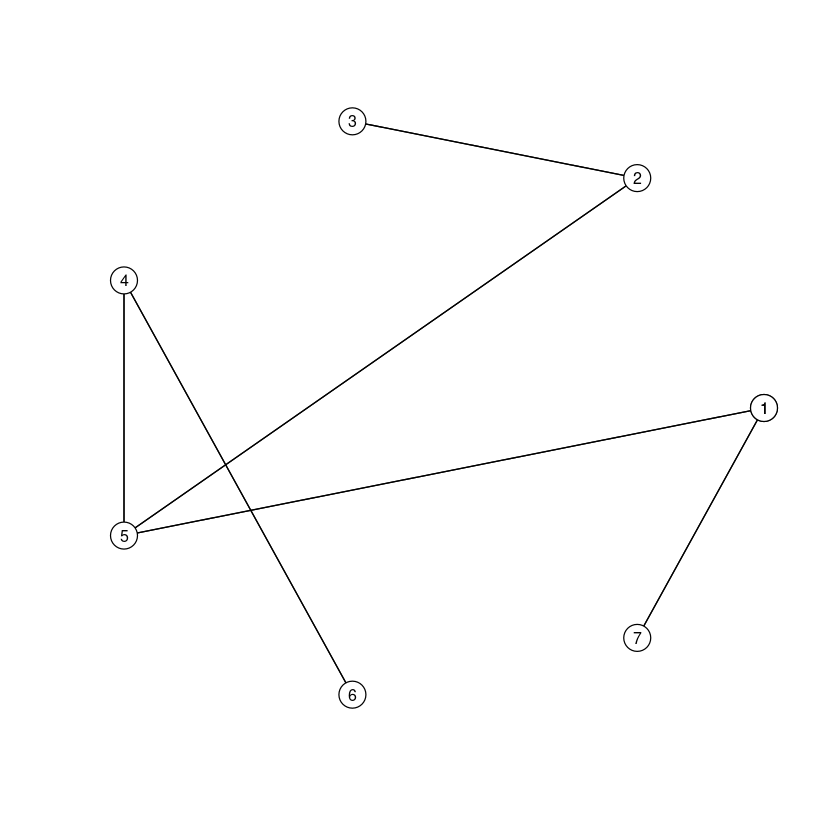

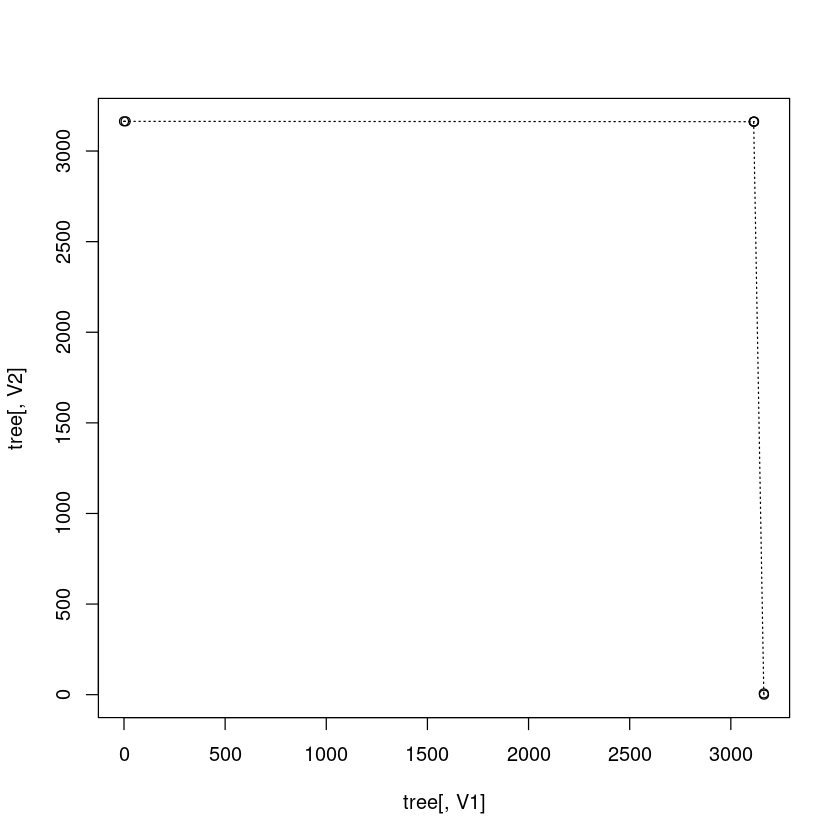

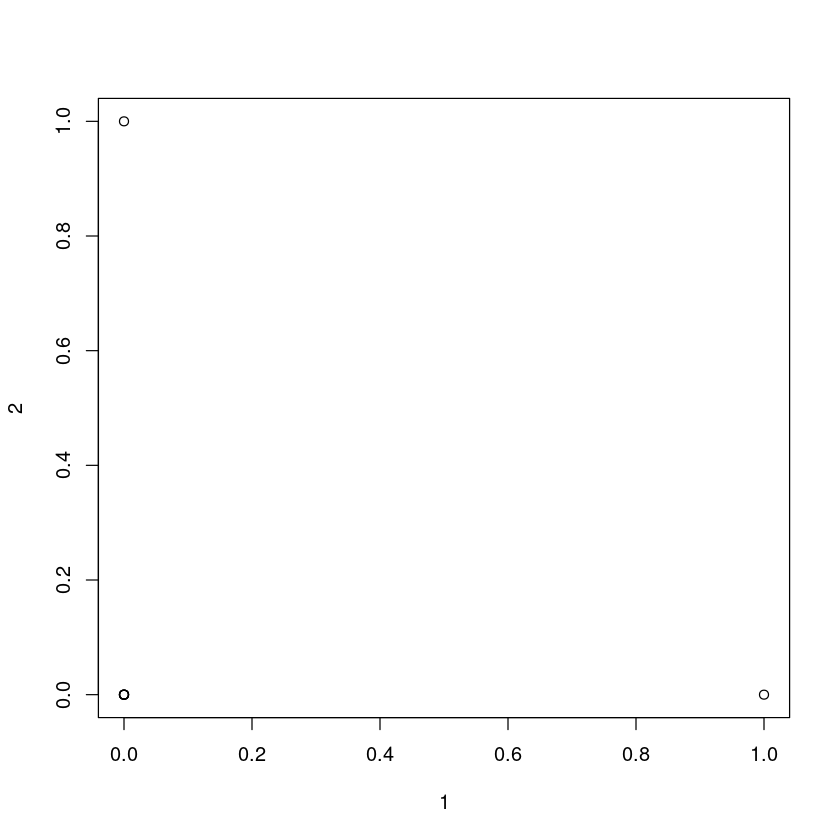

In [9]:
#simple plot
#plot(cgmst1)
plot(cgmst2)
plot(cgmst3)
plot(cgmst4)
#plot(cgmst5)

In [19]:
library(ggplot2)
library(ggrepel)

#PROBLEMS WITH COMPATIBILITY with ggplot: data must me data frame -> not mst-object!

#cgmst2 = with ape
ggplot(data = cgmst2, 
        #plot based on principel coordinate points
        aes(x = PrinC$x[, 1], y = PrinC$x[, 2], 
        from = from, to = to))+ 
    geom_point()
ggplot(data = cgmst2MAT, 
        #plot based on principel coordinate points
        aes(x = PrinC$x[, 1], y = PrinC$x[, 2], 
        from = from, to = to))+ 
    geom_point()




ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not an S3 object with class mst


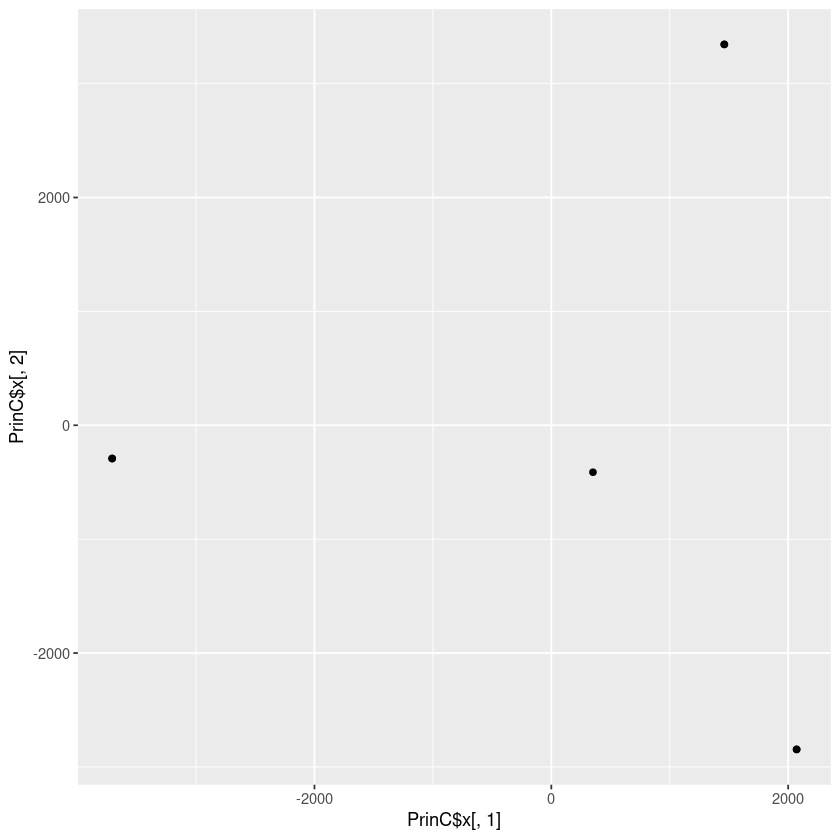

In [24]:
#cgmst3 = with emstree
ggplot(data = cgmst3, 
        #plot based on principel coordinate points
        aes(x = PrinC$x[, 1], y = PrinC$x[, 2], 
        from = from, to = to))+ 
    geom_point()


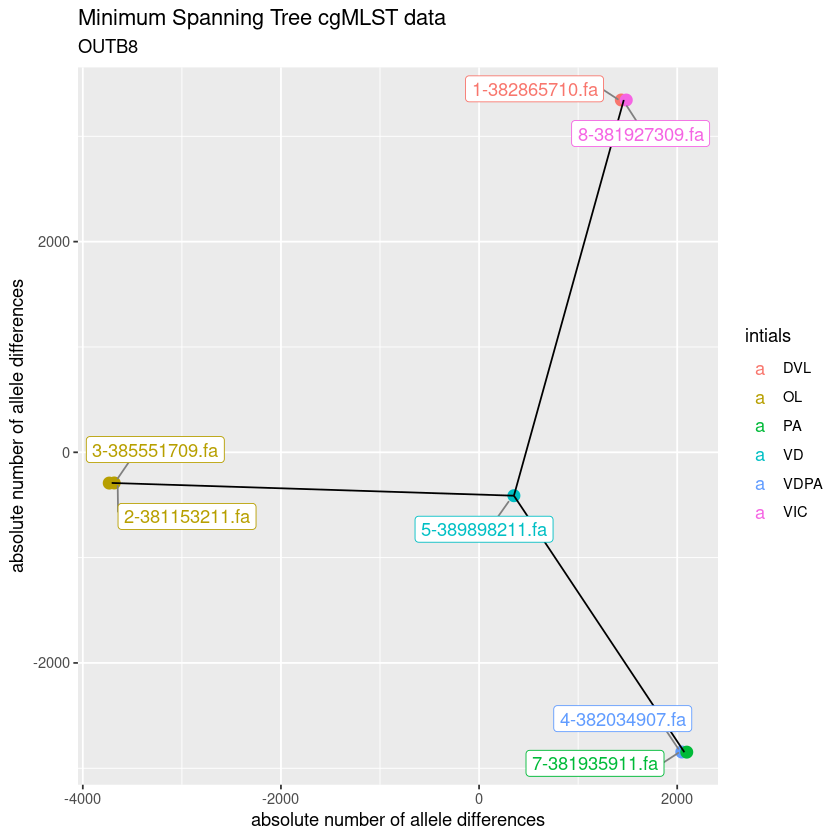

In [46]:
#extended plot in ggplot
library(ggplot2)
library(ggrepel)


Names = row.names(cgtable)

    #set colours for metadata column 7
    cgmst3$coloring <-as.factor(metadata[,7])
    title <-colnames(metadata)[7]

    ggplot(data = cgmst3, 
             #plot based on principel coordinate points
             aes(x = PrinC$x[, 1], y = PrinC$x[, 2], 
                 from = from, to = to, color=coloring))+ 
        labs(color=title)+
        #make sure data points are not overlapping with position_dodge2
        geom_point(size=3,position= position_dodge2(width=100))+
        stat_MST(colour = "black", linetype = 1)+ 
        geom_label_repel(aes(label = Names),
                         box.padding   = 0.35, 
                         point.padding = 0.5,
                         segment.color = 'grey50')+
        labs(title="Minimum Spanning Tree cgMLST data", subtitle="OUTB8", 
             x="absolute number of allele differences", y="absolute number of allele differences")

  

In [ ]:
#extended plot in ggplot for every metadata column
library(ggplot2)
library(ggrepel)


Names = row.names(cgtable)

for (i in 1:ncol(metadata)){
    #set colours
    cgmst3$coloring <-as.factor(metadata[,i])
    title <-colnames(metadata)[i]

    ggplot(data = cgmst3, 
             #plot based on principel coordinate points
             aes(x = PrinC$x[, 1], y = PrinC$x[, 2], 
                 from = from, to = to, color=coloring))+ 
        labs(color=title)+
        #make sure data points are not overlapping with position_dodge2
        geom_point(size=3,position= position_dodge2(width=100))+
        stat_MST(colour = "black", linetype = 1)+ 
        geom_label_repel(aes(label = Names),
                         box.padding   = 0.35, 
                         point.padding = 0.5,
                         segment.color = 'grey50')+
        labs(title="Minimum Spanning Tree cgMLST data", subtitle="OUTB8", 
             x="absolute number of allele differences", y="absolute number of allele differences")
}

#not visible here